In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore',category=FutureWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [6]:
data = pd.read_csv('/content/book.csv')
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


Data Description : The dataset has 2000 rows of the purchase transaction of people fromm the book stores. These transcation can be analyased and association rules can be genereated using basket analysis by apriori algporithm

Data Processing is not required as it is already in transaction format.

In [7]:
# Now We are going to explore the data.
number = data.loc[:,:].sum()
number

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas    74 
ItalArt      97 
Florence     217
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [12]:
for i in data.columns:
  print(i)
  print(data[i].value_counts())
  print()

ChildBks
0    1154
1    846 
Name: ChildBks, dtype: int64

YouthBks
0    1505
1    495 
Name: YouthBks, dtype: int64

CookBks
0    1138
1    862 
Name: CookBks, dtype: int64

DoItYBks
0    1436
1    564 
Name: DoItYBks, dtype: int64

RefBks
0    1571
1    429 
Name: RefBks, dtype: int64

ArtBks
0    1518
1    482 
Name: ArtBks, dtype: int64

GeogBks
0    1448
1    552 
Name: GeogBks, dtype: int64

ItalCook
0    1773
1    227 
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1    74  
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1    97  
Name: ItalArt, dtype: int64

Florence
0    1783
1    217 
Name: Florence, dtype: int64



DATA VISUALIZATION

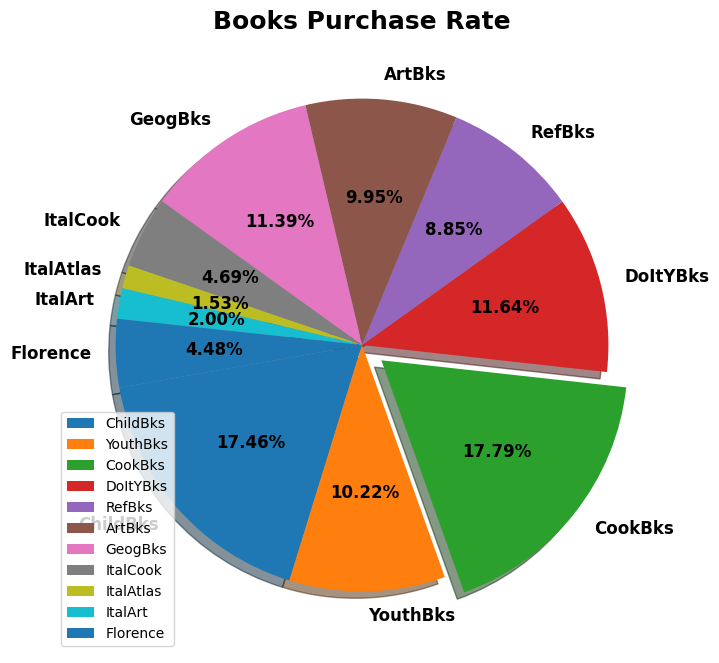

In [14]:
plt.figure(figsize=(12,8))
plt.pie(data.sum(),labels=data.columns,explode=[0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'best')
plt.title("Books Purchase Rate", fontsize = 18, fontweight = 'bold')
plt.show()

In [17]:
number.sort_values(0, ascending = True, inplace=False)
count = number.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

# Here we have the counts of most popular items sold (in the ascending order )

,items,count
0,ItalAtlas,74
1,ItalArt,97
2,Florence,217
3,ItalCook,227
4,RefBks,429
5,ArtBks,482
6,YouthBks,495
7,GeogBks,552
8,DoItYBks,564
9,ChildBks,846


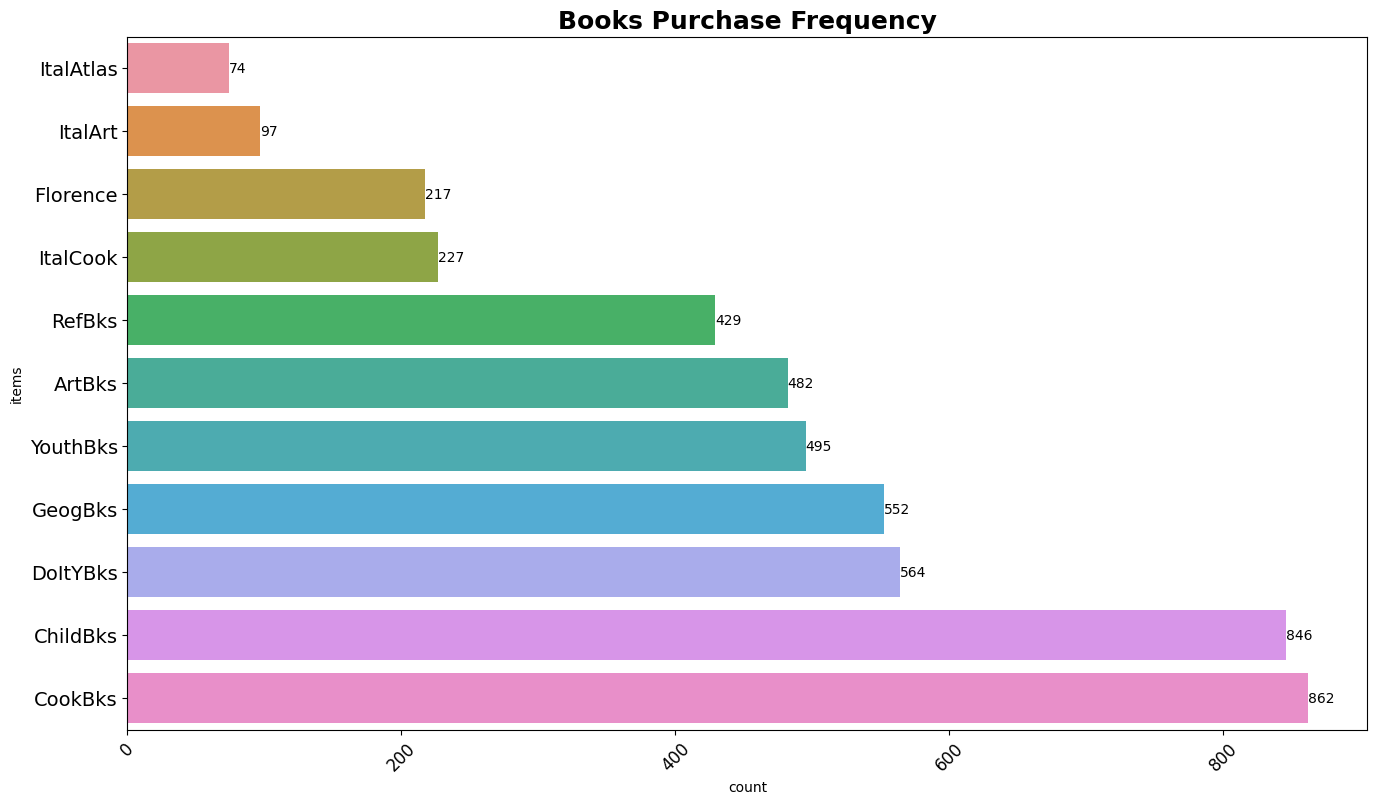

In [18]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = 'count', y = 'items', data= count)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Books Purchase Frequency',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

Form this we can clearly observe the that most frequently sold books are cooking books and child books.


## **If we divide all items with row number, we can find Support value. Our threshold value is 0.2 for Support value.**

In [19]:
first = pd.DataFrame(data.sum() / data.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first
# Total sales

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145
ItalCook,0.1135
Florence,0.1085
ItalArt,0.0485


In [21]:
first[first.Support >= 0.01]

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145
ItalCook,0.1135
Florence,0.1085
ItalArt,0.0485


In [22]:
first[first.Support >= 0.15]

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145


In [25]:
first[first.Support >= 0.2]

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145


Second Iteration : finding the support values for pair product combinations.


In [29]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
second[:10]

[['CookBks', 'ChildBks'],
 ['CookBks', 'DoItYBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'ArtBks'],
 ['CookBks', 'RefBks'],
 ['CookBks', 'ItalCook'],
 ['CookBks', 'Florence'],
 ['CookBks', 'ItalArt'],
 ['CookBks', 'ItalAtlas']]

Below We can get the different support values for different pairs of combination.

In [31]:
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum()
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
print(value)

[0.256, 0.1875, 0.1925, 0.162, 0.167, 0.1525, 0.1135, 0.0475, 0.041, 0.0285, 0.184, 0.195, 0.165, 0.1625, 0.1515, 0.085, 0.0485, 0.036, 0.0285, 0.1325, 0.1155, 0.1235, 0.1055, 0.0585, 0.0315, 0.03, 0.019, 0.1205, 0.1275, 0.1105, 0.064, 0.0425, 0.0295, 0.0205, 0.101, 0.0965, 0.059, 0.0255, 0.023, 0.0175, 0.0895, 0.0565, 0.0485, 0.0485, 0.018, 0.0465, 0.031, 0.02, 0.037, 0.0175, 0.0375, 0.023, 0.0125, 0.0065, 0.0165]


In [ ]:
# We have to convert them into dataframe  SI = second Iteration
SI = pd.DataFrame(value, columns = ["Support"])
SI["index"] = [tuple(i) for i in second]
SI['length'] = SI['index'].apply(lambda x:len(x))
SI = SI.set_index("index").sort_values("Support", ascending = False)
SI

In [35]:
SI.shape

(55, 2)

We gate the support values for 2 pair combination.


In [37]:
# Now we have to find the support values for three pair combination.
second = list(itertools.combinations(first.index, 3))
second = [list(i) for i in second]
second[:10]

[['CookBks', 'ChildBks', 'DoItYBks'],
 ['CookBks', 'ChildBks', 'GeogBks'],
 ['CookBks', 'ChildBks', 'YouthBks'],
 ['CookBks', 'ChildBks', 'ArtBks'],
 ['CookBks', 'ChildBks', 'RefBks'],
 ['CookBks', 'ChildBks', 'ItalCook'],
 ['CookBks', 'ChildBks', 'Florence'],
 ['CookBks', 'ChildBks', 'ItalArt'],
 ['CookBks', 'ChildBks', 'ItalAtlas'],
 ['CookBks', 'DoItYBks', 'GeogBks']]

In [38]:
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum()
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
print(value)

[0.146, 0.1495, 0.129, 0.1265, 0.1225, 0.085, 0.0335, 0.03, 0.0225, 0.1085, 0.095, 0.1015, 0.0845, 0.0585, 0.0235, 0.027, 0.015, 0.097, 0.1035, 0.089, 0.064, 0.031, 0.025, 0.016, 0.081, 0.0775, 0.059, 0.02, 0.0195, 0.0125, 0.07, 0.0565, 0.0315, 0.041, 0.014, 0.0465, 0.0205, 0.0165, 0.0285, 0.0175, 0.0375, 0.023, 0.0105, 0.0045, 0.013, 0.1045, 0.095, 0.095, 0.09, 0.046, 0.0225, 0.022, 0.017, 0.099, 0.102, 0.094, 0.0525, 0.0305, 0.023, 0.0175, 0.0805, 0.083, 0.046, 0.017, 0.0175, 0.015, 0.076, 0.0455, 0.0335, 0.036, 0.0155, 0.0415, 0.0215, 0.018, 0.0285, 0.014, 0.0285, 0.02, 0.0105, 0.0055, 0.0145, 0.068, 0.073, 0.0585, 0.0345, 0.0195, 0.0165, 0.0095, 0.06, 0.058, 0.031, 0.0135, 0.015, 0.009, 0.0535, 0.0365, 0.0245, 0.03, 0.01, 0.025, 0.0145, 0.011, 0.019, 0.009, 0.025, 0.0125, 0.0075, 0.003, 0.0095, 0.065, 0.057, 0.0345, 0.0165, 0.0145, 0.01, 0.0565, 0.036, 0.03, 0.0295, 0.0115, 0.029, 0.0195, 0.0135, 0.0205, 0.013, 0.024, 0.015, 0.009, 0.0045, 0.0115, 0.049, 0.0305, 0.019, 0.023, 0.009

In [39]:
# We have to convert them into dataframe  SI = second Iteration
SI = pd.DataFrame(value, columns = ["Support"])
SI["index"] = [tuple(i) for i in second]
SI['length'] = SI['index'].apply(lambda x:len(x))
SI = SI.set_index("index").sort_values("Support", ascending = False)
SI

,Support,length
index,,
"(CookBks, ChildBks, GeogBks)",0.1495,3
"(CookBks, ChildBks, DoItYBks)",0.1460,3
"(CookBks, ChildBks, YouthBks)",0.1290,3
"(CookBks, ChildBks, ArtBks)",0.1265,3
"(CookBks, ChildBks, RefBks)",0.1225,3
...,...,...
"(ItalCook, Florence, ItalAtlas)",0.0040,3
"(Florence, ItalArt, ItalAtlas)",0.0040,3
"(ArtBks, Florence, ItalAtlas)",0.0040,3


Association Rules:-

There are two main functions here.
- apriori() function evaluate support value for each product.
- association_rules() function help us to understand relationship between antecedents and consequences products. It gives some remarkable information about products.

Especially, "antecedent support", "consequent support", "support", "confidence" and	"lift" variables are very important to make some business decisions.

To construct association rules between elements or items, the algorithm considers 3 important factors which are, support, confidence and lift. Each of these factors is explained as follows:

Support: The support of item I is defined as the ratio between the number of transactions containing the item I by the total number of transactions expressed as :

Support(I)=Number of transactions containing I/Total number of Transactions

Confidence: This is measured by the proportion of transactions with item I1, in which item I2 also appears. The confidence between two items I1 and I2, in a transaction is defined as the total number of transactions containing both items I1 and I2 divided by the total number of transactions containing I1.

Confidence(I1->I2)=Number of Transactions containing I1 and I2/(Total Number of Transactions containing I1)

Lift: Lift is the ratio between the confidence and support expressed as :

Lift(I1->I2)=Confidence(I1->I2)/Support(I2)

# **Support values gives us these information:-**

**Head 5**
- 42 percent of 100 purchases are ChildBks
- 24 percent of 100 purchases are YouthBks
- 43 percent of 100 purchases are CookBks
- 28 percent of 100 purchases are DoltYBks
- 21 percent of 100 purchases are RefBks

**Tail 5**
- 10 percent of 100 purchases are ChildBks, GeogBks, DoItYBks
- 10 percent of 100 purchases are ChildBks, GeogBks, ArtBks
- 10 percent of 100 purchases are ArtBks, CookBks, DoItYBks
- 10 percent of 100 purchases are GeogBks, CookBks, DoItYBks
- 10 percent of 100 purchases are GeogBks, ArtBks, CookBks

In [40]:
# Association Rule with 10% support and 35% confidence
frequent_itemsets=apriori(data,min_support=0.1,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [44]:
# with 30% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
84,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
85,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
86,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
87,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


In [45]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
70,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
73,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
77,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
76,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
...,...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


In [46]:
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
84,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
85,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
86,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
87,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


# **Visualization of obtained rule.**

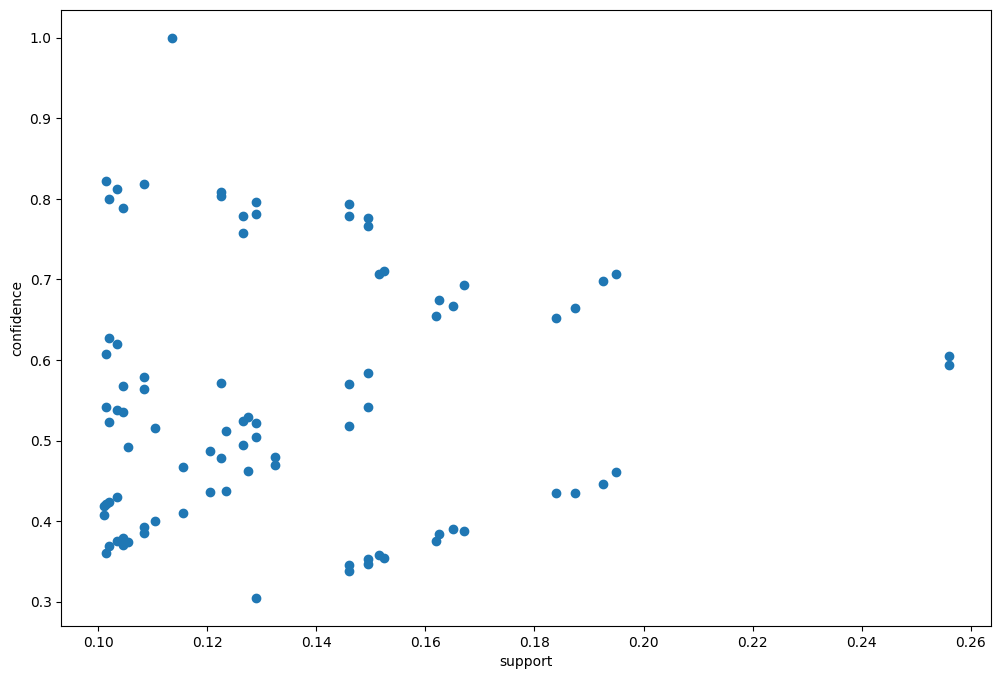

In [49]:
# visualization of obtained rule
plt.figure(figsize=(12,8))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [50]:
# Here are creating the new matrix format for which goes with what deciding in their A,C and lift ratios.
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(ChildBks),(YouthBks),(CookBks),(DoItYBks),(RefBks),(ArtBks),(GeogBks),"(CookBks, ChildBks)","(CookBks, YouthBks)","(ChildBks, DoItYBks)","(CookBks, DoItYBks)","(GeogBks, ChildBks)","(CookBks, GeogBks)","(ArtBks, ChildBks)","(CookBks, ArtBks)"
antecedents,,,,,,,,,,,,,,,
(YouthBks),1.576044,NaN,1.518667,1.654846,NaN,1.693281,1.764017,2.035985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(ChildBks),NaN,1.576044,1.404179,1.542511,1.669725,1.594028,1.670264,NaN,1.882497,NaN,1.840820,NaN,1.835989,NaN,NaN
"(GeogBks, DoItYBks)",1.864490,NaN,1.899926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(GeogBks, ChildBks)",NaN,NaN,1.778809,1.900346,NaN,2.170444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(CookBks, GeogBks)",1.835989,NaN,NaN,1.998711,NaN,2.230964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ArtBks, ChildBks)",NaN,NaN,1.806175,NaN,NaN,NaN,2.274247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(CookBks, ArtBks)",1.790745,NaN,NaN,2.155264,NaN,NaN,2.245509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ChildBks, RefBks)",NaN,NaN,1.876058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(CookBks, RefBks)",1.899004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0.5, 0, "frozenset({'ChildBks'})"),
  Text(1.5, 0, "frozenset({'YouthBks'})"),
  Text(2.5, 0, "frozenset({'CookBks'})"),
  Text(3.5, 0, "frozenset({'DoItYBks'})"),
  Text(4.5, 0, "frozenset({'RefBks'})"),
  Text(5.5, 0, "frozenset({'ArtBks'})"),
  Text(6.5, 0, "frozenset({'GeogBks'})"),
  Text(7.5, 0, "frozenset({'CookBks', 'ChildBks'})"),
  Text(8.5, 0, "frozenset({'CookBks', 'YouthBks'})"),
  Text(9.5, 0, "frozenset({'ChildBks', 'DoItYBks'})"),
  Text(10.5, 0, "frozenset({'CookBks', 'DoItYBks'})"),
  Text(11.5, 0, "frozenset({'GeogBks', 'ChildBks'})"),
  Text(12.5, 0, "frozenset({'CookBks', 'GeogBks'})"),
  Text(13.5, 0, "frozenset({'ArtBks', 'ChildBks'})"),
  Text(14.5, 0, "frozenset({'CookBks', 'ArtBks'})")])

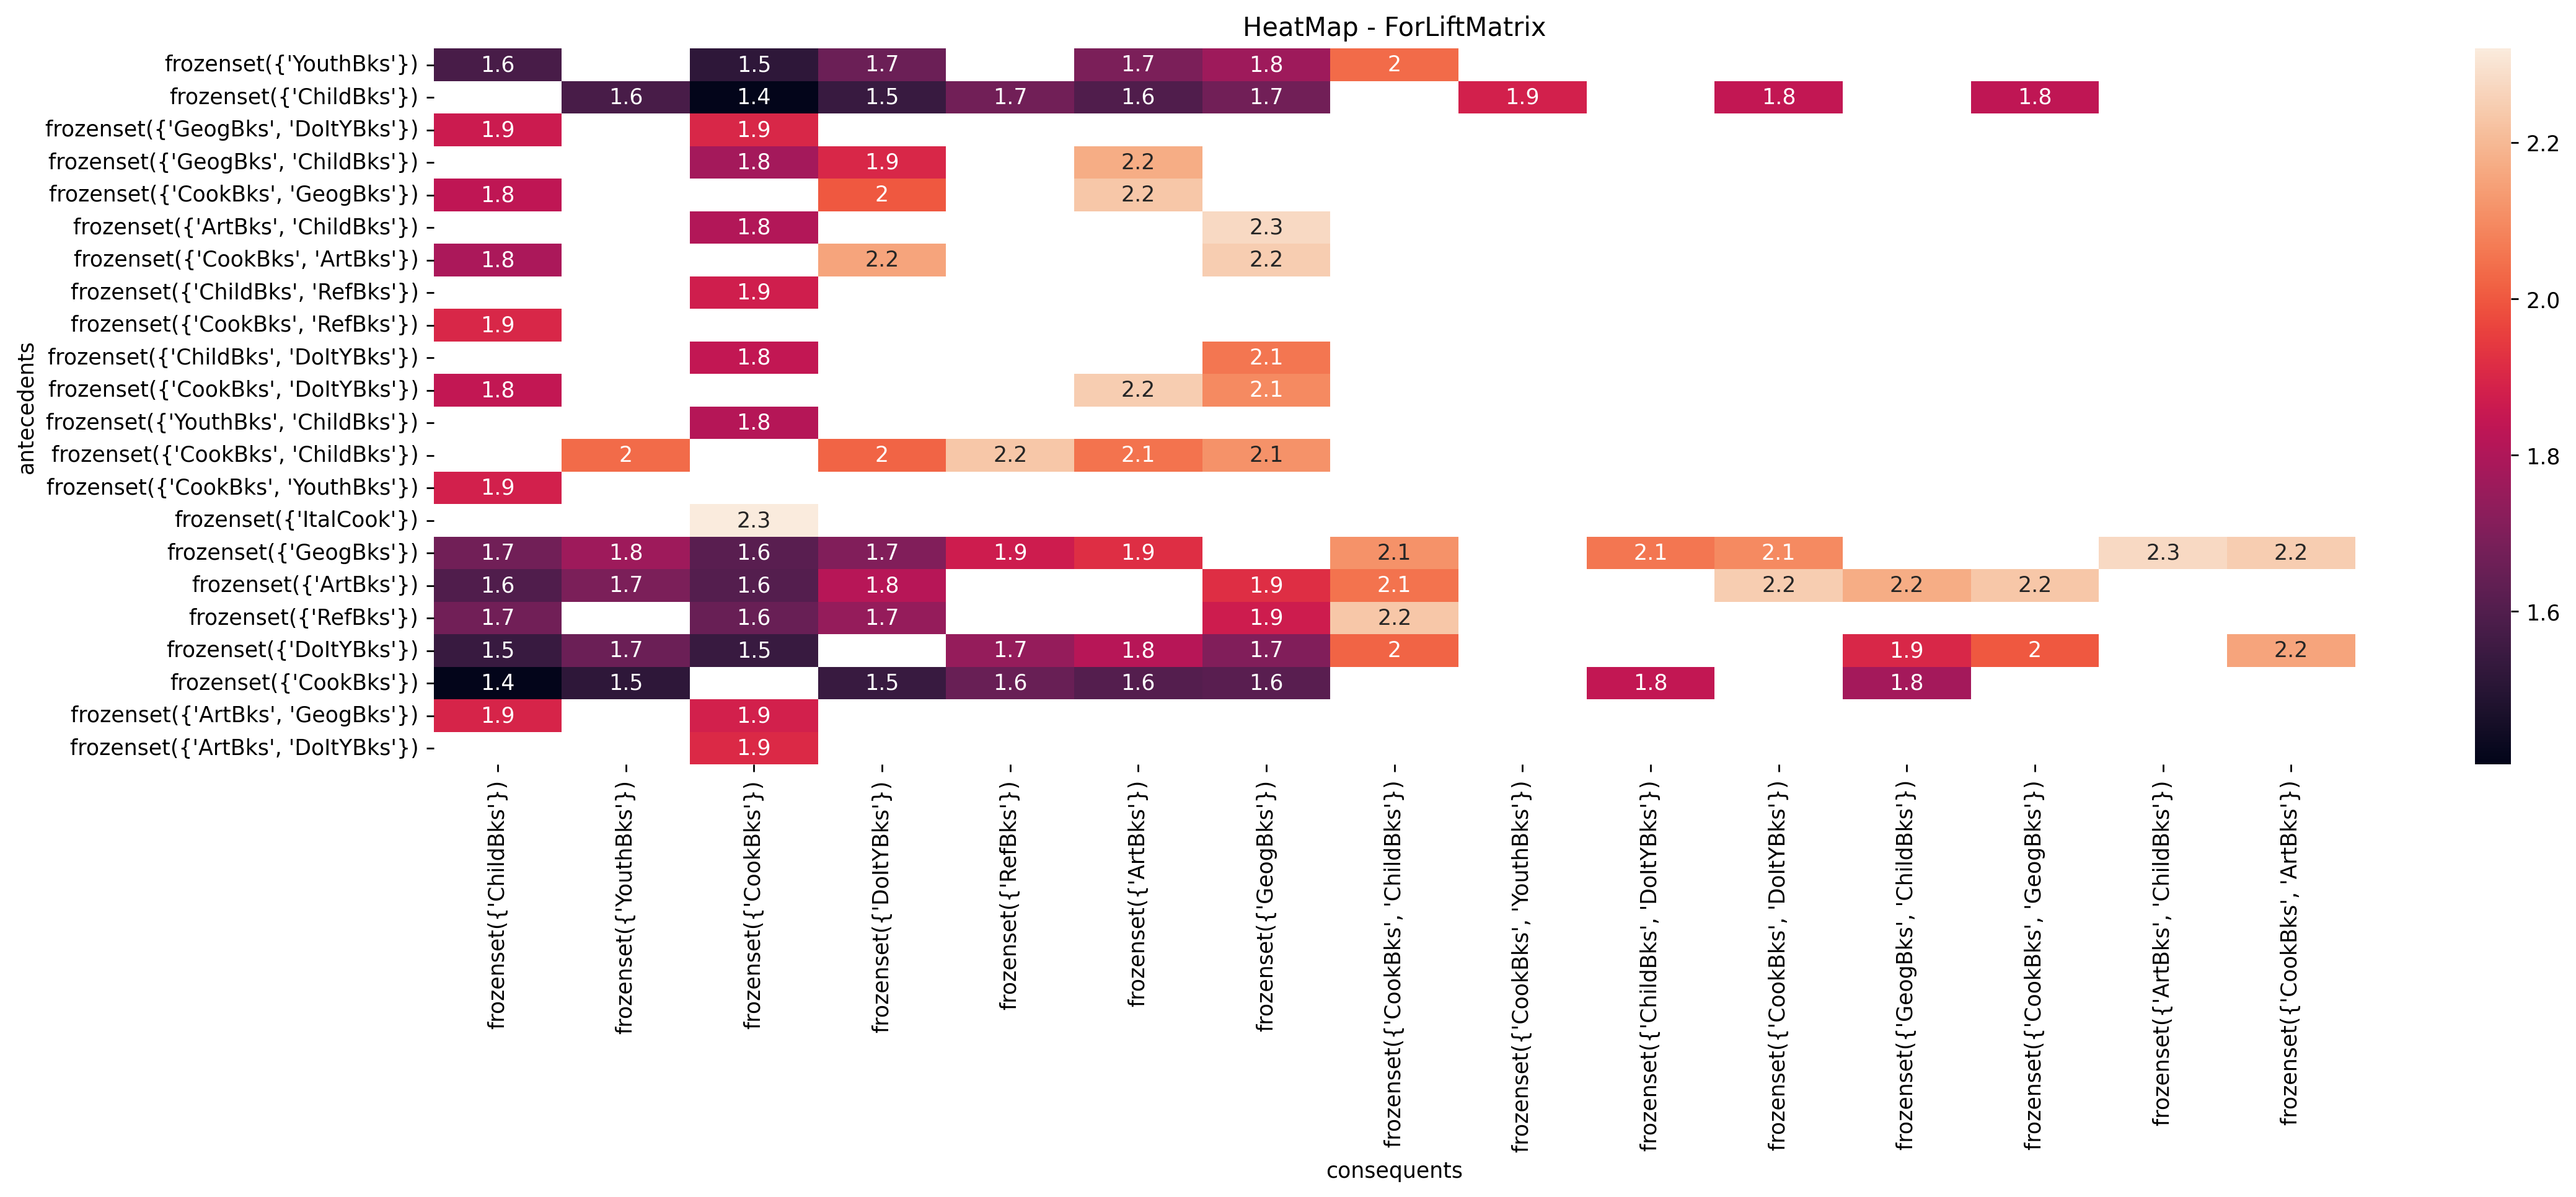

In [51]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

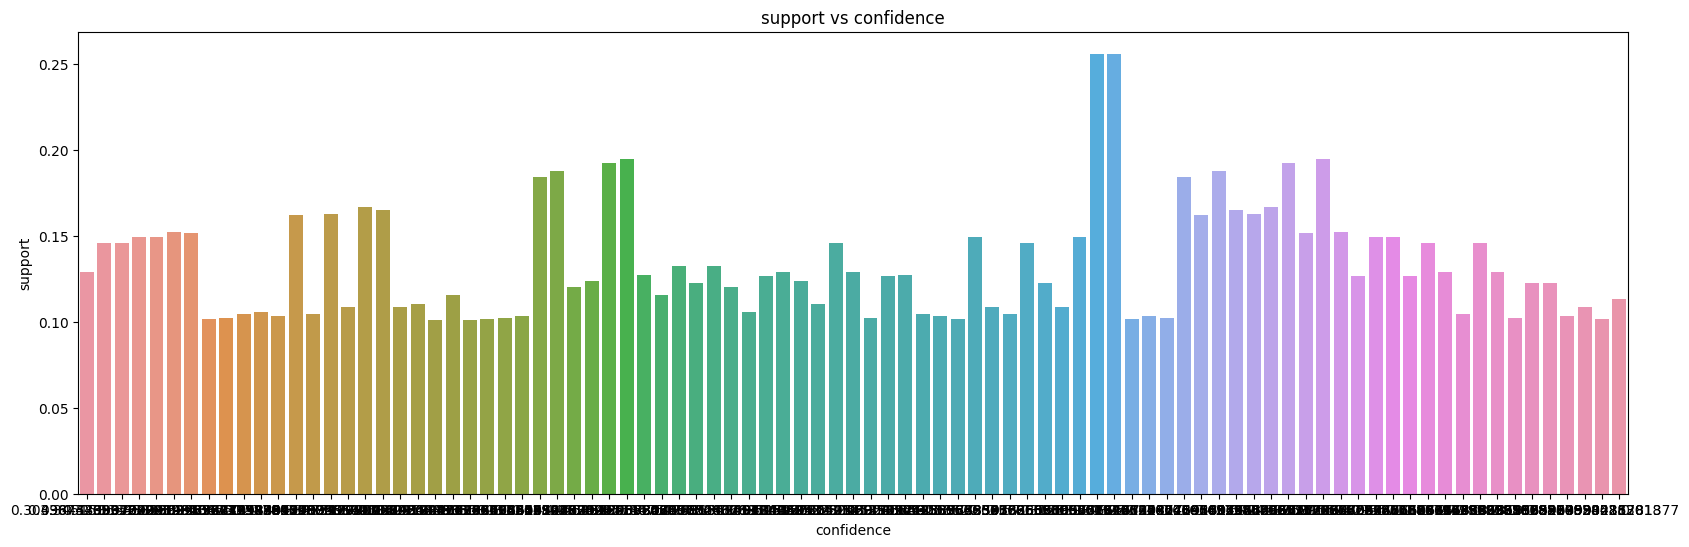

In [61]:
plt.figure(figsize=(20,6))
sns.barplot(lift, y='support', x='confidence')
plt.title("support vs confidence")
plt.show()

Text(0.5, 1.0, 'lift vs Confidence')

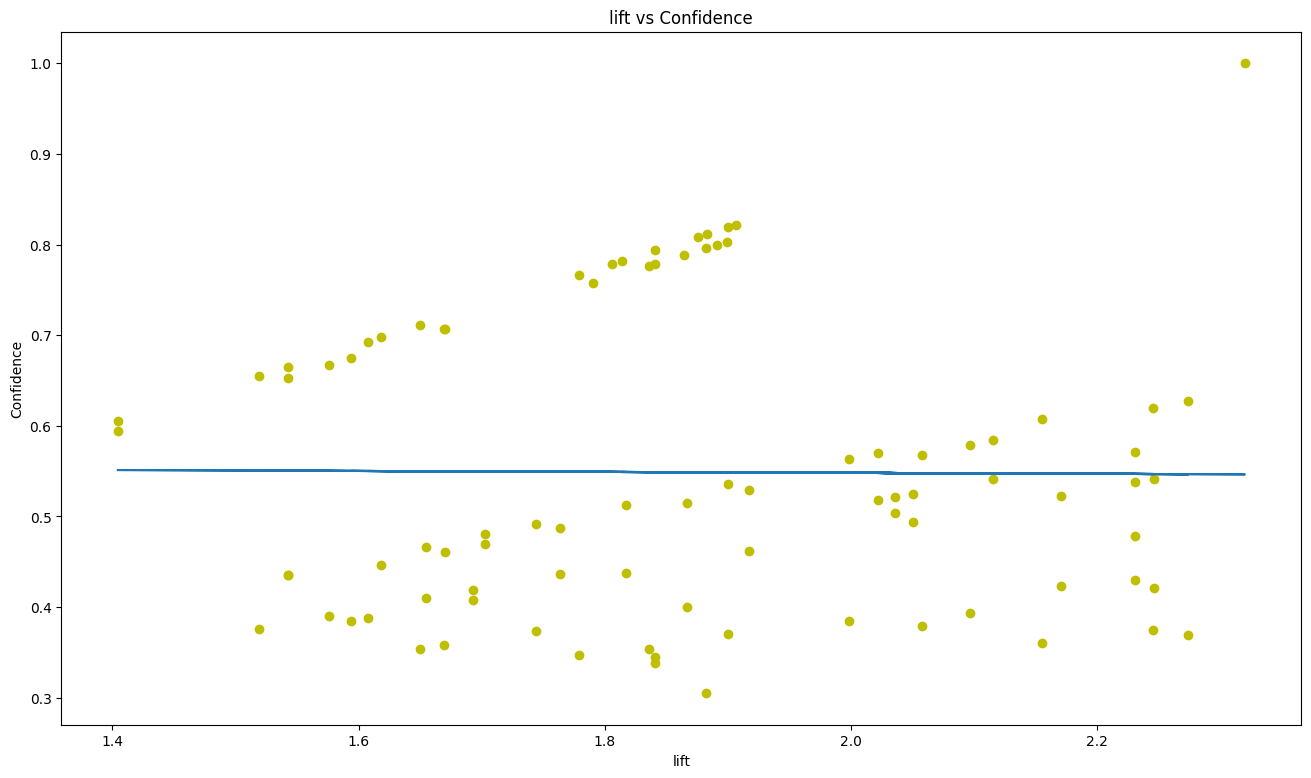

In [65]:
plt.figure(figsize=(16,9))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'],'yo',  rules['lift'],
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

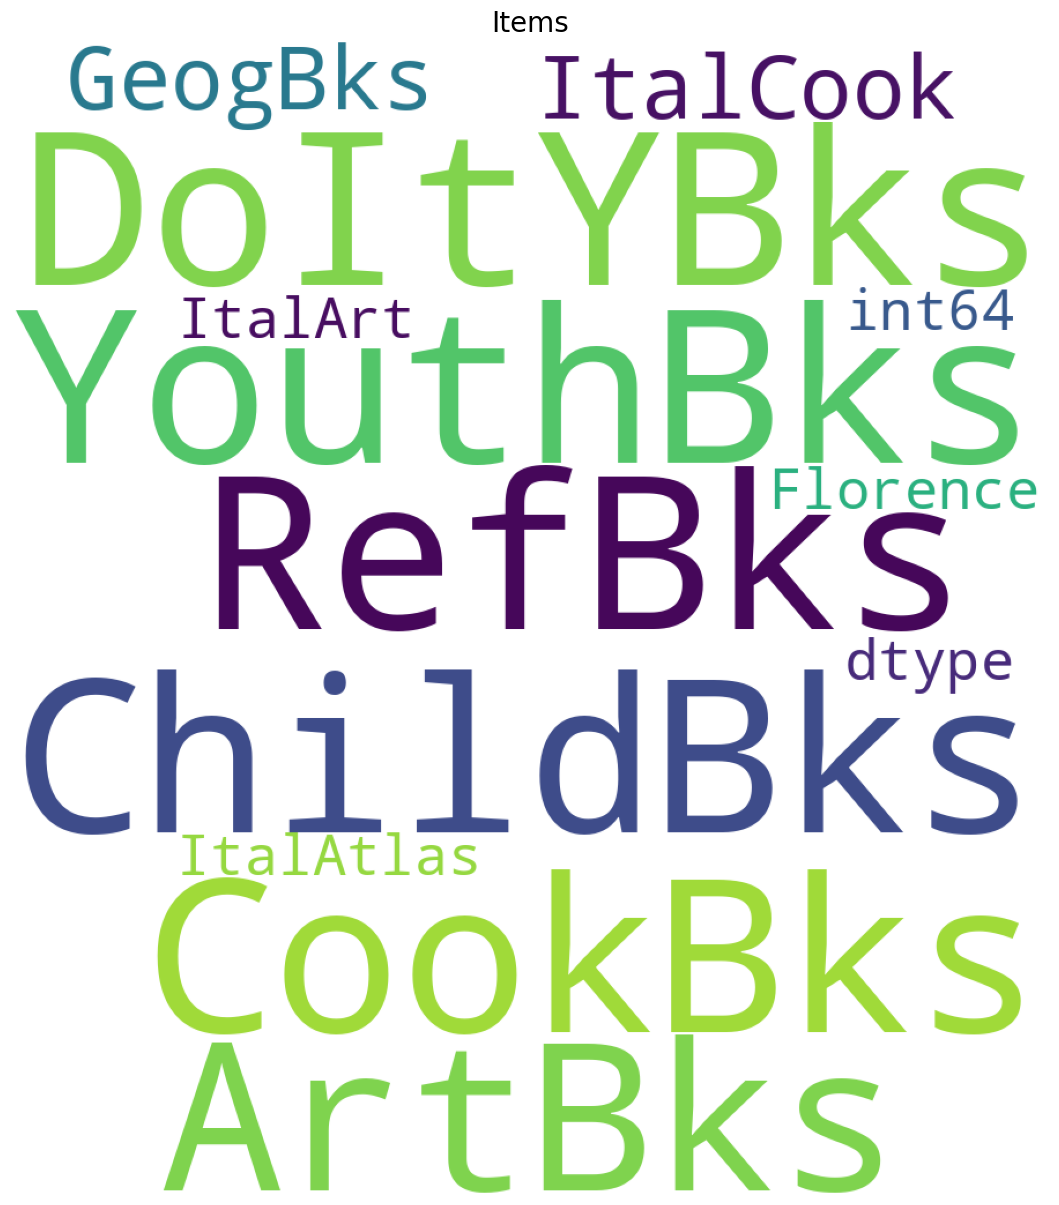

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 900,  height = 1000, max_words = 121).generate(str(data.sum()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()